读入ROOT文件，将tu,td以及ctof，cx存入新的ROOT文件。其中ctof=(tu+td)/2，cx=(tu-td)/2。

In [1]:
TFile *ipf=new TFile("tree.root");//打开ROOT文件
if (ipf->IsZombie()) {
    cout << "Error opening file" << endl;
    exit(-1);
}
ipf->cd();
//ipf->ls();
TTree *tree=(TTree*)ipf->Get("tree");
tree->Print()

******************************************************************************
*Tree    :tree      : tree structure                                         *
*Entries :   100000 : Total =         8428001 bytes  File  Size =    7138415 *
*        :          : Tree compression factor =   1.18                       *
******************************************************************************
*Br    0 :X         : X/D                                                    *
*Entries :   100000 : Total  Size=     802585 bytes  File Size  =     758680 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=   1.06     *
*............................................................................*
*Br    1 :Y         : Y/D                                                    *
*Entries :   100000 : Total  Size=     802585 bytes  File Size  =     559683 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=   1.43     *
*...................................................

In [2]:
//读root文件
Double_t X;//入射x位置
Double_t Y;
Double_t d;//飞行距离
Double_t E;//能量
int pID;    //粒子种类，n:pid=1,g:pid=0
Double_t TOF, CTOF;//TOF:粒子实际飞行时间，cTOF：计算得到的TOF
Double_t Tu, Td;
Double_t Qu, Qd;
tree->SetBranchAddress("CTOF",&CTOF);
tree->SetBranchAddress("TOF",&TOF);  
tree->SetBranchAddress("pID",&pID);
tree->SetBranchAddress("Tu",&Tu);   
tree->SetBranchAddress("Td",&Td);
tree->SetBranchAddress("Qu",&Qu);   
tree->SetBranchAddress("Qd",&Qd);

In [4]:
TCanvas *c1=new TCanvas();
c1->Clear();
TH1D *hTOF= new TH1D("hTOF","Time of flight", 1000,0,100);
//root2 对应变量
Double_t tu,td,ctof,cx;


//
TFile *opf=new TFile("tree2.root","recreate");
opf->cd();
TTree *opt=new TTree("tree","tree");
opt->Branch("tu",&tu,"tu/D");
opt->Branch("td",&td,"td/D");
opt->Branch("ctof",&ctof,"ctof/D");
opt->Branch("cx",&cx,"cx/D");
Long64_t nentries=tree->GetEntries();
for(Long64_t jentry=0; jentry<nentries; jentry++) {
    tree->GetEntry(jentry);
    hTOF->Fill(CTOF);
    tu=Tu;
    td=Td;
    cx=(Tu-Td)/2;
    ctof=(Tu+Td)/2;
    opt->Fill();
    if(jentry%10000==0) cout<<"process "<<jentry<<" of "<<nentries<<endl;
}
hTOF->Draw();
ipf->Close();
opt->Write();
opf->Close();

process 0 of 100000
process 10000 of 100000
process 20000 of 100000
process 30000 of 100000
process 40000 of 100000
process 50000 of 100000
process 60000 of 100000
process 70000 of 100000
process 80000 of 100000
process 90000 of 100000


In [5]:
TFile *ipf=new TFile("tree2.root");
ipf->ls()

TFile**		tree2.root	
 TFile*		tree2.root	
  KEY: TTree	tree;1	tree


In [6]:
TTree *tree=(TTree*)ipf->Get("tree");
tree->Print()

******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :   100000 : Total =         3210872 bytes  File  Size =    2990686 *
*        :          : Tree compression factor =   1.07                       *
******************************************************************************
*Br    0 :tu        : tu/D                                                   *
*Entries :   100000 : Total  Size=     802615 bytes  File Size  =     750230 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=   1.07     *
*............................................................................*
*Br    1 :td        : td/D                                                   *
*Entries :   100000 : Total  Size=     802615 bytes  File Size  =     745533 *
*Baskets :       26 : Basket Size=      32000 bytes  Compression=   1.08     *
*...................................................

In [7]:
tree->Show(1);

======> EVENT:1
 tu              = 58.514
 td              = 71.7367
 ctof            = 65.1254
 cx              = -6.61135


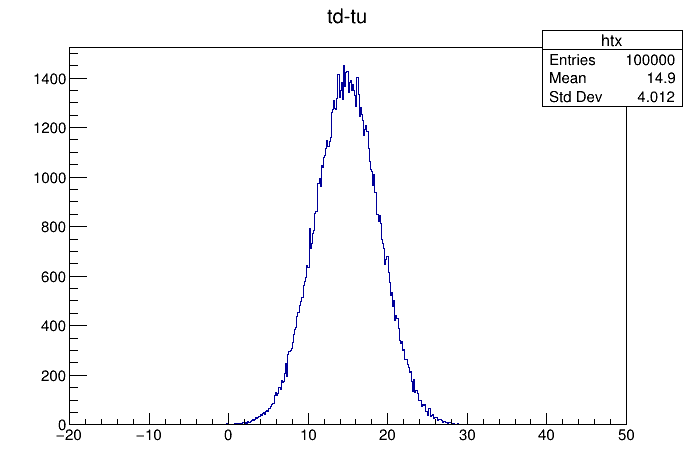

In [8]:
TCanvas *c1=new TCanvas();//* 在ROOT环境下可省略
c1->Clear();//* 在ROOT环境下可省略
tree->Draw("td-tu>>htx(500,-20,50)");//位置一维分布
c1->Draw();